In [1]:
from tensorflow import keras

In [2]:
model = keras.models.load_model("best-cnn-model.h5")

2022-08-18 10:07:52.582610: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-18 10:07:52.584405: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 10. Tune using inter_op_parallelism_threads for best performance.


In [3]:
model.layers

In [4]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [5]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.01196368 0.23201145


# 가중치 시각화

In [6]:
import matplotlib.pyplot as plt

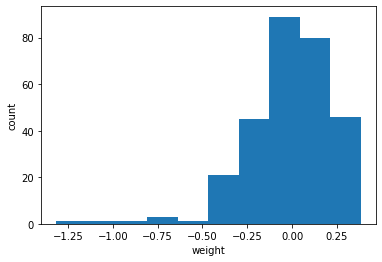

In [7]:
plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

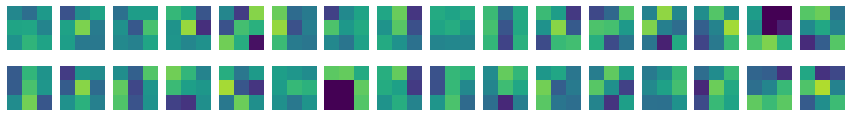

In [8]:
fig, axs = plt.subplots(2,16,figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i,j].imshow(conv_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
        axs[i,j].axis('off')
        
plt.show()

# 학습되지 않은 필터와 비교

In [9]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32,kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))

In [10]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [11]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

-0.008370029 0.08329595


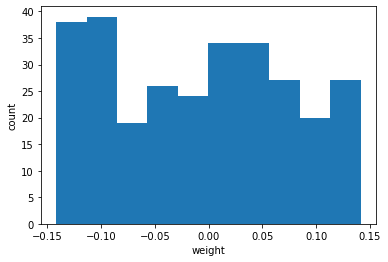

In [13]:
plt.hist(no_training_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

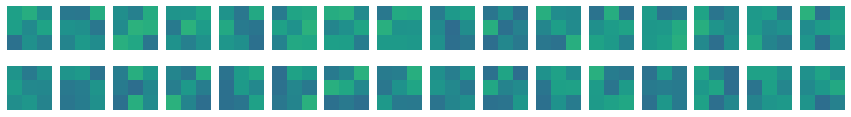

In [14]:
fig, axs = plt.subplots(2,16,figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i,j].imshow(no_training_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
        axs[i,j].axis('off')
        
plt.show()

In [15]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1,28,28,1) / 255.0 #케라스 합성곱 층은 3차원 입력을 기대->흑백이미지 임으로 이미지 가로,세로,1.
#컬러면 가로,세로,3
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

# 첫 번째 합성곱층의 특성 맵 시각화

In [18]:
model = keras.models.load_model("best-cnn-model.h5")
conv_acti = keras.Model(model.input, model.layers[0].output) #함수형 API
#conv_acti는 모델 객체의 입력과 첫번째 합성곱층의 출력으로 구성된 모델이 된다.

inputs = train_input[0:1].reshape(-1,28,28,1)/255.0
feature_maps = conv_acti.predict(inputs)
print(feature_maps.shape)

(1, 28, 28, 32)


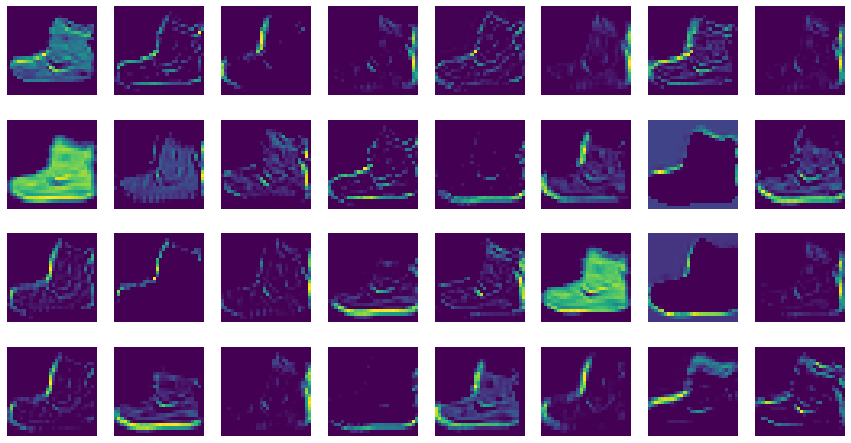

In [19]:
fig, axs = plt.subplots(4,8,figsize=(15,8))

for i in range(4):
    for j in range(8):
        axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
        axs[i,j].axis('off')
        
plt.show()

# 두 번째 합성곱층의 특성 맵 시각화

In [20]:
conv2_acti = keras.Model(model.input, model.layers[2].output)
feature_maps = conv2_acti.predict(inputs)
print(feature_maps.shape)

(1, 14, 14, 64)


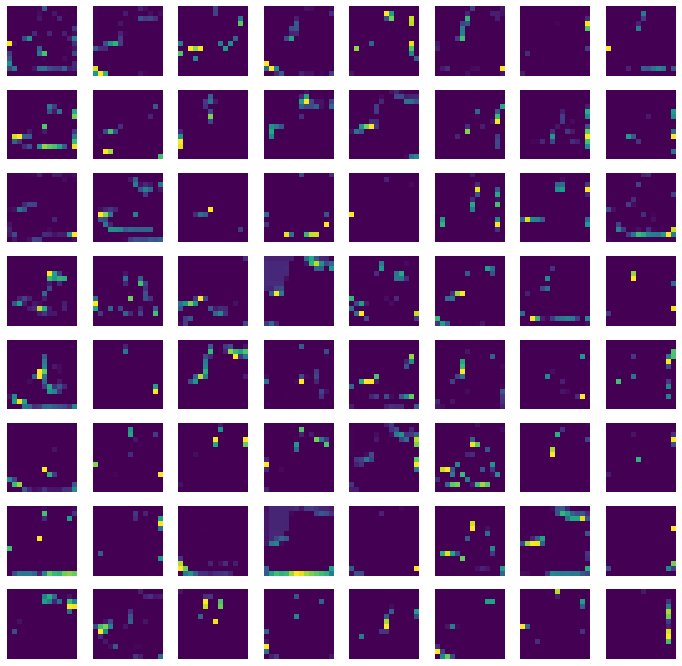

In [21]:
fig, axs = plt.subplots(8,8,figsize=(12,12))

for i in range(8):
    for j in range(8):
        axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
        axs[i,j].axis('off')
        
plt.show()